In [1]:
import tensorflow as tf
import numpy as np
import os

from data import DataCorpus

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

/Users/muzikin/anaconda/envs/tensorforce/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/muzikin/anaconda/envs/tensorforce/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
tf.reset_default_graph()

data = DataCorpus(
        'data/sparse_array_train_full_orig.npz',
    'data/sparse_array_test_full_orig.npz',
    #time_slice=[None, 128],
    batch_size=64,
    cv_fraction=0.1,
    train_repeats=100,
    full_shuffle=False,
)


[2018-05-28 14:48:13.797180] INFO: DataCorpus: loaded train data shape: (5000, 481, 25)
[2018-05-28 14:48:14.723252] INFO: DataCorpus: loaded test data shape: (5217, 487, 25)
[2018-05-28 14:48:14.772814] INFO: DataCorpus: cv_fraction: 0.1, train_size: 4500, cv size: 500


In [11]:
data.train_data_array[2,1,:]

array([5.0000000e+00, 1.0773000e+04, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.4763000e+04, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       3.2621175e+05], dtype=float32)

In [87]:
t_flag = data.train_data_array[:, 0 , -2]
t_sum = data.train_data_array[:, 0 , -1]
flag_from_sum = (t_sum > 0).astype('int')
(flag_from_sum == t_flag).all()


True

In [119]:
features = data.train_data_array[:, : , 2:-2]
sums = features.sum(axis=-1)
sums = sums > 0
sums.shape
late_clients = sums[:, 256:].any(axis=-1) 
late_clients.sum()

19

In [84]:
features = data.train_data_array[:, : , 2:]
np.log(features.max())

17.64558

In [72]:
entropy = []
for p in range(0, data.train_data_array.shape[1], 120):
    print(p)
    features = data.train_data_array[:,0:p, 2:-2]
    sums = features.sum(axis=-1)
    norm_sums = (sums.T / (sums.sum(axis=-1)+ 1e-6)).T
    norm_sums[norm_sums == 0] = 1e-10
    h = (- norm_sums * np.log(norm_sums)).sum(axis=-1)
    entropy.append(h)

0
120
240
360
480


In [62]:
len(entropy)

6

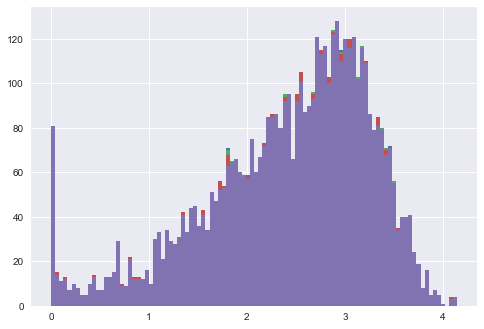

In [80]:
entropy.reverse()
plt.figure(0)
for h in entropy:
    h = h[h>0]
    _ = plt.hist(h, bins=100)
    

In [25]:
norm_sums

array([[0.31064102, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00080148, 0.00090563, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02556761, 0.04436796, 0.01648059, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06790794, 0.03308121, 0.01697699, ..., 0.        , 0.        ,
        0.        ],
       [0.00354929, 0.00540206, 0.02943674, ..., 0.        , 0.        ,
        0.        ],
       [0.7772725 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)